# 30. 形態素解析結果の読み込み

In [1]:
import MeCab
wakati = MeCab.Tagger()

In [2]:
#　分かち書き
with open("neko.txt", "r") as origin, \
    open("neko.txt.mecab", "w") as splited:
    for i in origin:
        text = wakati.parse(i)
        splited.write(text)

In [3]:
result = []
count = 0
with open("neko.txt.mecab", "r") as f:
    for i in f:
        count +=1
        if i == "EOS\n":
            continue
        
        surface, details = i.split("\t")
        if surface == "":
            continue

        detail = details.split(",")
        if len(detail) < 8:
            continue

        morpheme = {
            "surface": surface,
            "base"   : detail[7],
            "pos"    : detail[0],
            "pos1"   : detail[1],
        }
        result.append(morpheme)

In [4]:
result

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数詞'},
 {'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''},
 {'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞', 'pos1': ''},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '普通名詞'},
 {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': ''},
 {'surface': 'ある', 'base': '有る', 'pos': '動詞', 'pos1': '非自立可能'},
 {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'},
 {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '普通名詞'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': 'まだ', 'base': '未だ', 'pos': '副詞', 'pos1': ''},
 {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '非自立可能'},
 {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'},
 {'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''},
 {'surface': 'どこ', 'base': '何処', 'pos': '代名詞', 'pos1': ''},
 {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'},
 {'surface': '

# 31.動詞

In [5]:
verb = set()
for x in result:
    if x["pos"] == "動詞":
        verb.add(x["surface"])

In [6]:
verb

{'よみ',
 '潜り込ん',
 '睨め付け',
 '上がり',
 '鳴らす',
 '振え',
 '困っ',
 '脱ぎ',
 'あたっ',
 '仕',
 '交る',
 '動かし',
 '慾張っ',
 'もたし',
 '叶っ',
 '嘯い',
 '喜ぶ',
 'もらっ',
 '譲ら',
 '思い込める',
 '寝',
 '押し寄せ',
 '陣取っ',
 'い',
 '逢える',
 '犯さ',
 '畏まっ',
 'たくっ',
 '分っ',
 '割り込ん',
 '救い出し',
 '帰さ',
 '痛み入る',
 '砕い',
 'からかわ',
 '害する',
 '張る',
 '歩き',
 '走ら',
 '仕上がっ',
 '仰せ',
 '巻き付け',
 '考える',
 '巡り',
 '生き',
 'はなち',
 '疑わ',
 '遣わし',
 '飛び',
 '重ねる',
 '供し',
 '受け取ら',
 '利かし',
 '食おう',
 '取り払わ',
 '焦慮る',
 '吐き出す',
 '引き据え',
 'あっ',
 '云えよう',
 '経',
 '覚し',
 'すみ',
 '解せ',
 'かわら',
 '慕っ',
 '設け',
 '漲らす',
 '行',
 '引き付け',
 '取りはずす',
 '彫り付け',
 '腐る',
 'つらまえ',
 '思い込ん',
 'くぐっ',
 'とれ',
 '尖ん',
 '併ん',
 '能い',
 '驚い',
 '通さ',
 'おっしゃい',
 '話せる',
 'あこがれ',
 '怒る',
 '引き返し',
 '詰め',
 '罷り',
 '恃める',
 'やっつける',
 'かま',
 '待た',
 '承わら',
 'いじめ',
 '併べ',
 'ならべ',
 '生れつい',
 '滑り込む',
 '働か',
 '響け',
 '通りかかっ',
 '悩まし',
 '収める',
 '受',
 'くれ',
 'そり返っ',
 '浸っ',
 'じれ',
 '暴く',
 '追払わ',
 '習っ',
 'やる',
 '任せ',
 'ふる',
 '植え付け',
 '拝する',
 '廻わし',
 '抛り込む',
 '退く',
 '膨れ返っ',
 '定め',
 '上がら',
 '授け',
 '移ら',
 '働',
 '乞わ',
 'うたい',
 '呑み込む',
 

# 32. 動詞の基本形

In [7]:
verb = set()
for x in result:
    if x["pos"] == "動詞":
        verb.add(x["base"])

# 33. 「AのB」

In [8]:
noun = set()

for i in range(1, len(result)-1):
    if result[i-1]["pos"] == "名詞"  and result[i]["surface"] == "の" and result[i+1]["pos"] == "名詞":
        noun.add(result[i-1]["surface"]+result[i]["surface"]+result[i+1]["surface"])
    

In [9]:
noun

{'屋根の上',
 '松風の音',
 '衣装の歴史',
 '将来の参考',
 '崇高の大差',
 'ところのもの',
 '溝の中',
 '囚人の一人',
 '秋の初',
 '鰹節の一',
 '親指の股',
 '懲らしめのため',
 '家の書生',
 '左の耳',
 '初めの勢',
 '梅の花',
 '鼻の汗',
 '発明の定石',
 '北国の冬空',
 '例の赤本',
 '手あぶりの角',
 '同情の至り',
 '九州の炭坑',
 '時の顔',
 '兄弟の離れ',
 '座敷の椽',
 '毎日の業務',
 '孤灯の下',
 '金田の倉',
 '文明のため',
 '所の三毛',
 '一人の女',
 '時分の事',
 '多くの顔',
 '方の考',
 '掌の上',
 '奥の間',
 '自分の容貌',
 '倫理の教師',
 '行為の結果',
 '主人の鼻',
 '泥足のまま',
 '相の手',
 '杉垣の隙',
 '南側の方面',
 '冥々の裡',
 '陽性の癇癪',
 '紙の力',
 '陥落の号外',
 '年の長日',
 '演説の続き',
 '天女の鼻',
 '紐の色',
 '近辺のもの',
 '自分の住家',
 '針仕事の手',
 'ものの五六',
 '余りの三',
 '奥の部屋',
 '釜の蓋',
 '人間の心',
 '成功の紀念',
 '唐紙の傍',
 '主人の話し',
 '一遇の光栄',
 '和魂の芝居',
 '合の割合',
 '横丁の長範',
 '世界の表面',
 '垣根の下',
 '三の顔',
 '研究のため',
 '金の威光',
 '船頭の仮',
 '顔の掃除',
 'うちの主人',
 '英雄の鼻柱',
 '知事の娘',
 '本の間',
 '壺の中',
 '宝の持ち腐れ',
 '先生の手紙',
 '栄達の士',
 '近所の猫',
 '多年の疑団',
 '間の白雨',
 '卒業の日',
 '一家の事情',
 '場末の名主',
 '微塵の責任',
 '婦人の会',
 '顔の中央',
 '片輪のくせ',
 '地の隙',
 '得意のもの',
 '社の石',
 '七輪の中',
 '自分の皿',
 '時機の一',
 '自己の思索',
 '主人の服装',
 '髷の重み',
 '江湖の処士',
 '猿股の発明',
 '滑脱の世界',
 '他の化物',
 '足の裏',
 '一

# 34. 名詞の連接

In [10]:
nouns = []
count = 0
text  = ""
for x in result:
    if x["pos"] == "名詞":
        text += x["surface"]
        count +=1
    else:
        if count >= 2:
            nouns.append(text)
        count = 0
        text = ""
    

In [11]:
set(nouns)

{'まま迷亭',
 '平均男子',
 '一二歩',
 '今呼吸',
 '量見',
 '拍子木',
 '束髪姿',
 '代り鼻',
 '日英同盟',
 '候敬具',
 '二倍',
 '一二尺',
 '赤十字',
 'アルコール中毒',
 '学者作家',
 '折々人',
 '雌猫雄猫',
 '一応頭',
 '格言通り',
 '三度以上',
 '金田事件',
 'いくら功徳',
 '垣一重',
 '金田家',
 '妙詩',
 '大方虫',
 '一たび時機',
 'そもそも恋',
 'ちとり',
 '富子嬢',
 'まま後架',
 '願わく',
 '少々休養',
 '風流気',
 '雪江嬢',
 '自弁休養',
 'ねえ奥',
 '危機一髪',
 '四寸',
 '右往左往',
 '黒繻子',
 '文明中学二年',
 '万一病気',
 '武右衛門先生',
 '三年前',
 '苦労千万',
 'ほとんど百',
 '夫子自身',
 '泥棒陰',
 'せんだって妻',
 '毎日毎日書斎',
 '文部大臣',
 '六尺',
 '巨人引力',
 '形ち',
 '毎日散歩',
 '迷亭一流',
 '四五丁',
 '水島寒月',
 '曲がり加減',
 '家伝来',
 '刺物',
 '無期徒刑',
 '十分間',
 '今鈴木',
 '千年',
 '行灯袴',
 '昨日紹介',
 '一通り障子',
 '三ぜん',
 '平均四五百円',
 '一世紀',
 '仕方なし',
 '一今',
 '甘木医学',
 '山の芋一箱',
 '対馬海峡',
 '二三度',
 '折柄格子戸',
 '事風呂敷',
 '裸蝋燭',
 '胴間声',
 '古史伝説',
 '斑入',
 '当人自身',
 '堀り',
 '沈澱組',
 '覚禅師',
 '凱旋祝賀会',
 '千七百八十六年',
 '校舎建築',
 '七分三',
 'しき光',
 '三女子',
 '格子戸',
 '春や',
 '日夜間断',
 '一条',
 '何条',
 '寒月以上',
 '一杯',
 '事迷亭',
 '異体同心',
 '胡麻塩色',
 'さっき湯',
 '万年',
 '十文字',
 '一人天下',
 '反射作用',
 '二三',
 '浅草花屋敷',
 '始終無線電信',
 '書生以外',
 '考え違',
 '通り風呂場',
 '候段',
 '今時

# 35. 単語の出現頻度

In [18]:
from collections import Counter
words = []

for item in result:
    words.append(item["surface"])

Counter(words)


Counter({'の': 9550,
         '。': 7486,
         'て': 7416,
         'に': 7017,
         '、': 6773,
         'は': 6500,
         'と': 6160,
         'を': 6119,
         'が': 5399,
         'で': 4537,
         'た': 3988,
         'も': 3253,
         '「': 3238,
         '」': 3238,
         'だ': 2719,
         'し': 2536,
         'ない': 2422,
         'から': 2217,
         'か': 2050,
         'ある': 1726,
         'ん': 1662,
         'な': 1614,
         'いる': 1255,
         '事': 1212,
         'する': 1055,
         'もの': 1004,
         'へ': 995,
         'です': 977,
         '君': 971,
         '云う': 937,
         '主人': 934,
         '何': 715,
         '御': 707,
         'ね': 693,
         'よう': 683,
         '—': 666,
         'この': 655,
         'その': 620,
         'それ': 612,
         'ば': 600,
         'そう': 570,
         'い': 552,
         'なる': 538,
         'よ': 498,
         '一': 490,
         'なら': 486,
         '人': 486,
         '吾輩': 481,
         'さ': 480,
         'これ': 472,
      

# 36. 頻度上位10語

In [30]:
# pip3 install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

counts = Counter(words).most_common()

for i in counts[:10]:
    print(i)

('の', 9550)
('。', 7486)
('て', 7416)
('に', 7017)
('、', 6773)
('は', 6500)
('と', 6160)
('を', 6119)
('が', 5399)
('で', 4537)


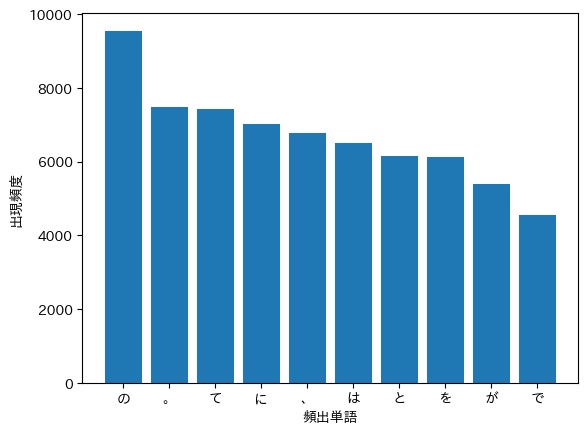

In [31]:
x = [ w[0] for w in counts[:10]]
y = [ w[1] for w in counts[:10]]

fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_xlabel('頻出単語')
ax.set_ylabel('出現頻度')
plt.show()


# 37. 「猫」と共起頻度の高い上位10語

In [73]:
results = []
morphs = []
count = 0

with open("neko.txt.mecab", "r") as f:
    for i in f:
        count += 1
        
        if i == "EOS\n" and len(morphs) > 0:
            results.append(morphs)
            morphs = []
            continue

        parts = i.split("\t")
        if len(parts) < 2:
            continue

        surface, details = parts
        if surface == "":
            morphs = []
            continue

        detail = details.split(",")
        if len(detail) < 8:
            morphs = []
            continue

        morpheme = {
            "surface": surface,
            "base"   : detail[7],
            "pos"    : detail[0],
            "pos1"   : detail[1],
        }
        morphs.append(morpheme)


In [77]:
words = []
for morphs in results:
    if '猫' in [x['surface'] for x in morphs]:
        for morph in morphs:
            if morph['surface'] != '猫':
                words.append(morph['surface'])

In [78]:
import matplotlib.pyplot as plt
import japanize_matplotlib

counts = Counter(words).most_common()

for i in counts[:10]:
    print(i)

('の', 365)
('に', 253)
('は', 252)
('て', 230)
('、', 227)
('と', 206)
('を', 198)
('。', 195)
('で', 170)
('が', 164)


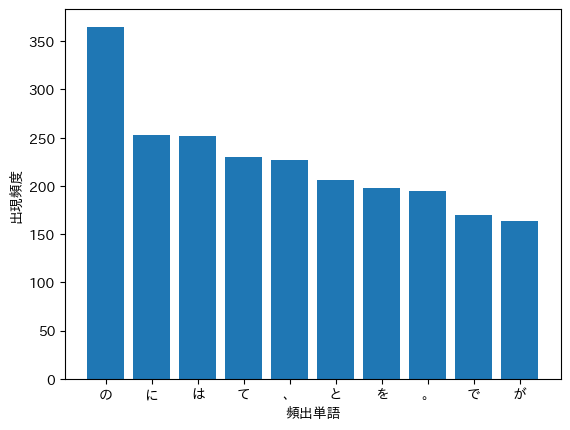

In [79]:
x = [ w[0] for w in counts[:10]]
y = [ w[1] for w in counts[:10]]

fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_xlabel('頻出単語')
ax.set_ylabel('出現頻度')
plt.show()


# 38. ヒストグラム

In [85]:
from collections import Counter
words = []

for item in result:
    words.append(item["surface"])

counts = Counter(words)

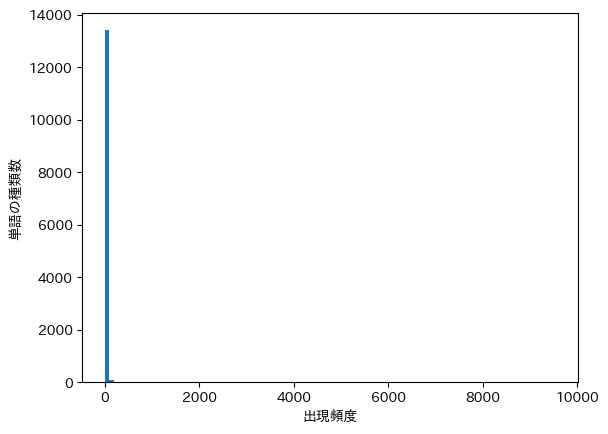

In [86]:
fig, ax = plt.subplots()
ax.hist(counts.values(), bins=100)
ax.set_xlabel('出現頻度')
ax.set_ylabel('単語の種類数')
plt.show()


# 39. Zipfの法則

In [90]:
y = sorted(counts.values(), reverse=True)
x = [ i+1 for i in range(len(y))]


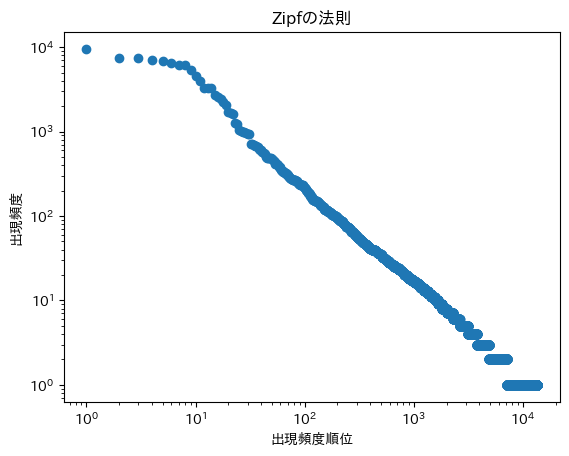

In [91]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Zipfの法則')
ax.set_xlabel('出現頻度順位')
ax.set_ylabel('出現頻度')
plt.show()